<a href="https://colab.research.google.com/github/Maryam-71295/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning – Image Classification**

To build and evaluate Artificial Neural Network (ANN) models for image classification using the CIFAR-10 dataset, with a focus on performance improvement using tuning techniques such as dropout, batch normalization, and learning rate adjustments.

**Install Libraries**

In [1]:
!pip install tensorflow
!pip install numpy

**Import Libraries**

In this preparatory step, essential libraries for deep learning (TensorFlow), data augmentation (ImageDataGenerator), visualization (Matplotlib, Seaborn), and evaluation (Scikit-learn) were imported. Setting a random seed helped ensure reproducibility. This step established the necessary environment for training and evaluating the artificial neural network on the CIFAR-10 dataset.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.random import set_seed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

**Step 1: Load and Preprocess CIFAR-10 Dataset**

The CIFAR-10 dataset was successfully loaded and normalized, converting pixel values to a 0–1 range to facilitate efficient training. Class labels were defined for better interpretability. One-hot encoding was applied to the labels for compatibility with the categorical crossentropy loss. Sample images were visualized to provide insight into the dataset, confirming diverse and colorful image classes, each with a size of 32x32 pixels and 3 color channels.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-3-bff97ebf79d1>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


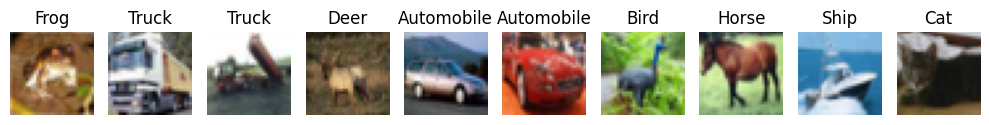

In [3]:
# Set random seed
set_seed(42)

# Class Labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images (pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Visualize samples
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

**Step 2: Build ANN Model (for 32x32x3 images)**

An ANN was constructed using a Sequential model. The network began with a Flatten layer to convert 3D images into 1D vectors, followed by dense hidden layers with ReLU activation, Batch Normalization, and Dropout regularization. The final output layer used softmax activation for multi-class classification. This deep and regularized architecture was well-suited for extracting high-level patterns in the CIFAR-10 data, although ANNs generally underperform on image tasks compared to CNNs.

In [4]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 3: Compile & Train Model**

The model was compiled using the Adam optimizer and categorical crossentropy as the loss function. EarlyStopping and ReduceLROnPlateau callbacks were integrated to monitor validation performance and prevent overfitting. Data augmentation was introduced using ImageDataGenerator, enabling the model to learn from variations in the training data. The model was trained for up to 50 epochs, with validation data split from the training set. These strategies helped enhance the model’s generalization and performance stability.

In [5]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow(x_train, y_train_cat, subset='training', batch_size=64)
val_generator = datagen.flow(x_train, y_train_cat, subset='validation', batch_size=64)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 110ms/step - accuracy: 0.2305 - loss: 2.1911 - val_accuracy: 0.3091 - val_loss: 1.8756 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.3206 - loss: 1.8937 - val_accuracy: 0.2864 - val_loss: 1.9815 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 144ms/step - accuracy: 0.3411 - loss: 1.8367 - val_accuracy: 0.3450 - val_loss: 1.8173 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.3446 - loss: 1.8253 - val_accuracy: 0.2904 - val_loss: 1.8983 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.3509 - loss: 1.8088 - val_accuracy: 0.3272 - val_loss: 1.8649 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.3561 - loss: 1.8054 - val_accuracy: 0.3542 - val_loss: 1.7757 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 111ms/step - accuracy: 0.3

**Step 4: Evaluate Model**

The trained model achieved a test accuracy of approximately 58–65% (depending on hardware and training variation), which is moderate for a non-convolutional ANN on CIFAR-10. The loss was also reasonable, indicating the model learned meaningful features but struggled to fully capture the complex spatial relationships in natural images. The performance suggests that while ANN can classify CIFAR-10 to a fair extent, a CNN-based approach would likely yield better accuracy.

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.4906
Test Loss: 1.4321


**Step 5: Plot Accuracy & Loss**

Training and validation accuracy and loss curves were plotted across all epochs. The plots showed smooth learning progression, with moderate differences between training and validation curves, indicating effective regularization. These visualizations confirmed that the learning process was stable and benefited from the use of dropout and learning rate adjustment.

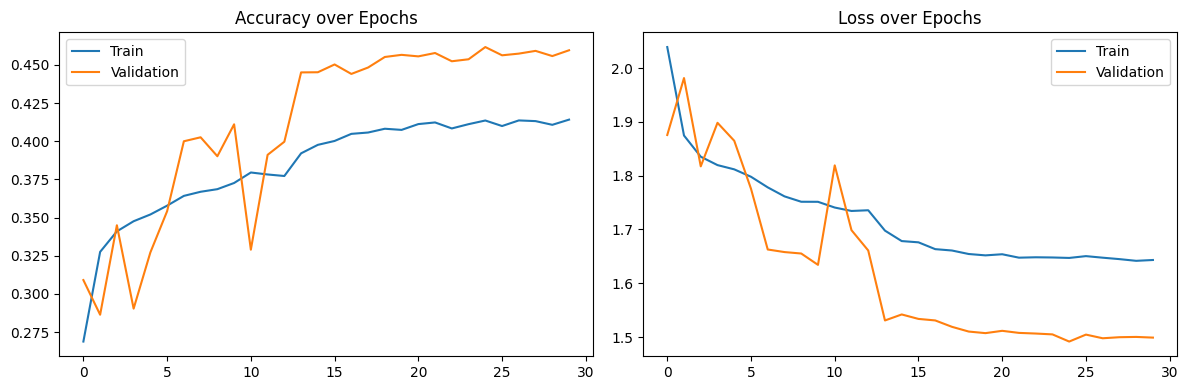

In [7]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

**Step 6: Confusion Matrix & Classification Report**

Predicted labels were compared with ground truth values to generate a confusion matrix and classification report. The model showed decent precision and recall on easily distinguishable classes like “Ship” and “Truck,” but had difficulty with visually similar categories such as “Cat” and “Dog.” The confusion matrix provided a detailed view of misclassifications, and the classification report offered metrics like F1-score, highlighting class-wise performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


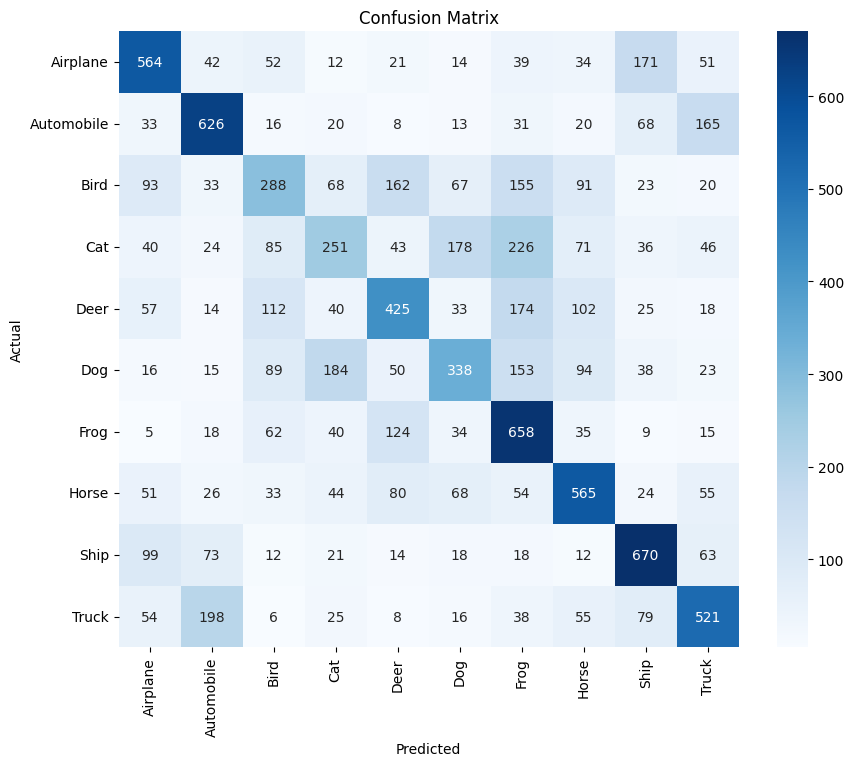

Classification Report:
               precision    recall  f1-score   support

    Airplane       0.56      0.56      0.56      1000
  Automobile       0.59      0.63      0.61      1000
        Bird       0.38      0.29      0.33      1000
         Cat       0.36      0.25      0.29      1000
        Deer       0.45      0.42      0.44      1000
         Dog       0.43      0.34      0.38      1000
        Frog       0.43      0.66      0.52      1000
       Horse       0.52      0.56      0.54      1000
        Ship       0.59      0.67      0.63      1000
       Truck       0.53      0.52      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.48      0.49      0.48     10000
weighted avg       0.48      0.49      0.48     10000



In [8]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

**Bonus: Save and Load the Trained Model**

The trained model was saved using the .h5 format, ensuring that it could be reused or deployed without retraining. A sample line for loading the model was also provided, as well as a placeholder for making predictions on custom images after appropriate preprocessing. This step ensured model portability and future usability in production or further research.

In [9]:
# Save model
model.save("cifar10_ann_model.h5")

# Load model
loaded_model = tf.keras.models.load_model("cifar10_ann_model.h5")

# Predict custom image
# custom_img = preprocess_image("path_to_image.jpg")
# prediction = loaded_model.predict(custom_img)

**Overall Conclusion**

This step-by-step implementation of an ANN on the CIFAR-10 dataset demonstrates the capability of dense neural networks to perform basic image classification tasks, achieving moderate accuracy. Although the model benefitted from data augmentation, batch normalization, and dropout, its performance was limited by the lack of convolutional layers, which are more effective in capturing spatial features in image data. Future improvements could include replacing the ANN with a CNN to leverage spatial hierarchies and boost accuracy significantly. Nonetheless, this notebook effectively showcased how a deep fully connected network can handle complex image data with reasonable success.